In [1]:
import git
repo = git.Repo(".", search_parent_directories=True)
dir_path = repo.working_tree_dir
%cd $dir_path

/data/reventh/habitat-lab


/data/reventh/anaconda3/envs/habitat/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# @title Installation

!curl -L https://raw.githubusercontent.com/facebookresearch/habitat-sim/main/examples/colab_utils/colab_install.sh | NIGHTLY=true bash -s
!mkdir -p content/habitat-sim/data/scene_datasets/mp3d/
!wget -c http://dl.fbaipublicfiles.com/habitat/mp3d_example.zip && unzip -o mp3d_example.zip -d content/habitat-sim/data/scene_datasets/mp3d/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0     49      0 --:--:-- --:--:-- --:--:--    49
bash: line 1: 404:: command not found
--2024-03-14 10:09:49--  http://dl.fbaipublicfiles.com/habitat/mp3d_example.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.15, 13.226.210.25, 13.226.210.78, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.15|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Archive:  mp3d_example.zip
  inflating: content/habitat-sim/data/scene_datasets/mp3d/17DRP5sb8fy/17DRP5sb8fy.glb  
  inflating: content/habitat-sim/data/scene_datasets/mp3d/17DRP5sb8fy/17DRP5sb8fy.navmesh  
  inflating: content/habitat-sim/data/scene_datasets/mp3d/17DRP5sb8fy/17DRP5sb8fy.house  
  inflatin

In [ ]:
!pip uninstall --yes pyopenssl
!pip install pyopenssl

Found existing installation: pyOpenSSL 24.0.0
Uninstalling pyOpenSSL-24.0.0:
  Successfully uninstalled pyOpenSSL-24.0.0
  Using cached pyOpenSSL-24.0.0-py3-none-any.whl.metadata (12 kB)
Using cached pyOpenSSL-24.0.0-py3-none-any.whl (58 kB)


In [3]:
# @title Colab Setup and Imports { display-mode: "form" }
# @markdown (double click to see the code)

import os
import random
import sys

import numpy as np
from gym import spaces

%matplotlib inline
from matplotlib import pyplot as plt

from PIL import Image

import habitat
from habitat.core.logging import logger
from habitat.core.registry import registry
from habitat.sims.habitat_simulator.actions import HabitatSimActions
from habitat.tasks.nav.nav import NavigationTask
from habitat_baselines.common.baseline_registry import baseline_registry
from habitat_baselines.config.default import get_config as get_baselines_config
from habitat_sim.utils.common import d3_40_colors_rgb

/data/reventh/anaconda3/envs/habitat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# @title Define Observation Display Utility Function { display-mode: "form" }

# @markdown A convenient function that displays sensor observations with matplotlib.

# @markdown (double click to see the code)


# Change to do something like this maybe: https://stackoverflow.com/a/41432704
def display_sample(
    rgb_obs, semantic_obs=np.array([]), depth_obs=np.array([])
):  # noqa: B006

    rgb_img = Image.fromarray(rgb_obs, mode="RGB")
    return rgb_img

    # arr = [rgb_img]
    # titles = ["rgb"]
    # if semantic_obs.size != 0:
    #     semantic_img = Image.new(
    #         "P", (semantic_obs.shape[1], semantic_obs.shape[0])
    #     )
    #     semantic_img.putpalette(d3_40_colors_rgb.flatten())
    #     semantic_img.putdata((semantic_obs.flatten() % 40).astype(np.uint8))
    #     semantic_img = semantic_img.convert("RGBA")
    #     arr.append(semantic_img)
    #     titles.append("semantic")

    # if depth_obs.size != 0:
    #     depth_img = Image.fromarray(
    #         (depth_obs / 10 * 255).astype(np.uint8), mode="L"
    #     )
    #     arr.append(depth_img)
    #     titles.append("depth")

    # plt.figure(figsize=(12, 8))
    # for i, data in enumerate(arr):
    #     ax = plt.subplot(1, 3, i + 1)
    #     ax.axis("off")
    #     ax.set_title(titles[i])
    #     plt.imshow(data)
    # plt.show(block=False)

## Setup PointNav Task

In [4]:
def get_habitatenv():
    config = habitat.get_config(
        config_path="benchmark/nav/pointnav/pointnav_habitat_test.yaml",
        overrides=[
            "habitat.environment.max_episode_steps=10",
            "habitat.environment.iterator_options.shuffle=True",
        ],
    )

    try:
        env.close()  # type: ignore[has-type]
    except NameError:
        pass
    env = habitat.Env(config=config)
    return env

In [16]:
env = get_habitatenv()
obs = env.reset()
img1 = display_sample(obs["rgb"]) 

2024-02-21 10:09:33,410 Initializing dataset PointNav-v1


2024-02-21 10:09:33,771 initializing sim Sim-v0
[10:09:33:777666]:[Warning]:[Assets] ResourceManager.cpp(369)::loadSemanticSceneDescriptor : SSD File Naming Issue! Neither SceneInstanceAttributes-provided name : `2024-02-21 10:09:34,708 Initializing task Nav-v0
data/scene_datasets/habitat-test-scenes/skokloster-castle.scn` nor constructed filename : `data/scene_datasets/habitat-test-scenes/info_semantic.json` exist on disk.
[10:09:34:704342]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 0


Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0


In [17]:
count = 0
for i in range(100):
    obs = env.reset()
    img2 = display_sample(obs["rgb"]) 
    count += int(img1==img2)
env.close()

Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulato

In [18]:
count
# This means that if line 257 in env.py is changed to `self.  _episode_from_iter_on_reset = True` then the environment will reset the episode every time it is called.

0

In [19]:
env = get_habitatenv()

2024-02-21 10:09:50,660 Initializing dataset PointNav-v1
2024-02-21 10:09:51,109 initializing sim Sim-v0
[10:09:51:119236]:[Warning]:[Assets] ResourceManager.cpp(369)::loadSemanticSceneDescriptor : SSD File Naming Issue! Neither SceneInstanceAttributes-provided name : `data/scene_datasets/habitat-test-scenes/skokloster-castle.scn` nor constructed filename : `data/scene_datasets/habitat-test-scenes/info_semantic.json` exist on disk.
2024-02-21 10:09:52,002 Initializing task Nav-v0


Renderer: NVIDIA GeForce RTX 3090/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 535.129.03
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-com

[10:09:51:999523]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 0


In [20]:
obs = env.reset()

Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0


In [21]:
obs = env.step("turn_left")

action:  {'action': 'turn_left'}
task_action: <habitat.tasks.nav.nav.TurnLeftAction object at 0x7f2661901af0>
Simulator: HabitatSim(config=Configuration(sim_cfg=<habitat_sim._ext.habitat_sim_bindings.SimulatorConfiguration object at 0x7f2660f91ef0>, agents=[AgentConfiguration(height=1.5, radius=0.1, sensor_specifications=[<habitat_sim._ext.habitat_sim_bindings.CameraSensorSpec object at 0x7f266179f540>, <habitat_sim._ext.habitat_sim_bindings.CameraSensorSpec object at 0x7f266179f810>], action_space={0: ActionSpec(name='stop', actuation=None), 1: ActionSpec(name='move_forward', actuation=ActuationSpec(amount=0.25, constraint=None)), 2: ActionSpec(name='turn_left', actuation=ActuationSpec(amount=10, constraint=None)), 3: ActionSpec(name='turn_right', actuation=ActuationSpec(amount=10, constraint=None))}, body_type='cylinder')], metadata_mediator=None, enable_batch_renderer=False), agents=[Agent(agent_config=AgentConfiguration(height=1.5, radius=0.1, sensor_specifications=[<habitat_sim._e

In [40]:
obs = env.reset()
print(
            "distance to goal: {:.2f}".format(
                obs["pointgoal_with_gps_compass"][0]
            )
        )
print(
            "angle to goal (radians): {:.2f}".format(
                obs["pointgoal_with_gps_compass"][1]
            )
        )

Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
Inside get_agent in Simulator.py: 0
distance to goal: 10.40
angle to goal (radians): 1.46


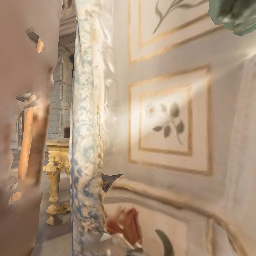

In [41]:
display_sample(obs["rgb"])

In [12]:
obs = env.step({"action":("turn_left", "move_forward"), "action_args":{'turn_left':180, 'move_forward': 10}})

action:  {'action': ('turn_left', 'move_forward'), 'action_args': {'turn_left': 180, 'move_forward': 10}}
task_action: <habitat.tasks.nav.nav.TurnLeftAction object at 0x7f26618acc70>
Simulator: HabitatSim(config=Configuration(sim_cfg=<habitat_sim._ext.habitat_sim_bindings.SimulatorConfiguration object at 0x7f26618ae3b0>, agents=[AgentConfiguration(height=1.5, radius=0.1, sensor_specifications=[<habitat_sim._ext.habitat_sim_bindings.CameraSensorSpec object at 0x7f2661aa4400>, <habitat_sim._ext.habitat_sim_bindings.CameraSensorSpec object at 0x7f2661aa43b0>], action_space={0: ActionSpec(name='stop', actuation=None), 1: ActionSpec(name='move_forward', actuation=ActuationSpec(amount=0.25, constraint=None)), 2: ActionSpec(name='turn_left', actuation=ActuationSpec(amount=10, constraint=None)), 3: ActionSpec(name='turn_right', actuation=ActuationSpec(amount=10, constraint=None))}, body_type='cylinder')], metadata_mediator=None, enable_batch_renderer=False), agents=[Agent(agent_config=AgentCon

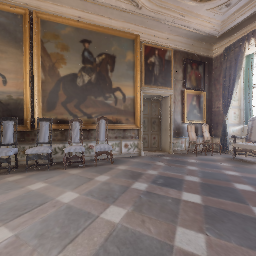

In [13]:
display_sample(obs["rgb"])

In [14]:
print(
            "distance to goal: {:.2f}".format(
                obs["pointgoal_with_gps_compass"][0]
            )
        )
print(
            "angle to goal (radians): {:.2f}".format(
                obs["pointgoal_with_gps_compass"][1]
            )
        )

distance to goal: 6.08
angle to goal (radians): 2.57


In [13]:
os.getcwd()

'/data/reventh/habitat-lab'

In [5]:
import sys
sys.path.append('examples/tutorials')
from random_walk_sim.parametrized_action import ParamaterizedActionConfig
from random_walk_sim.parametrized_action import add_param_actions


In [6]:
config = habitat.get_config(
        config_path="benchmark/nav/pointnav/pointnav_habitat_test.yaml",
        overrides=[
            "habitat.environment.iterator_options.shuffle=False",
        ]
    )

config = add_param_actions(config)

In [7]:
env = habitat.Env(config=config)

2024-03-14 10:10:12,540 Initializing dataset PointNav-v1
2024-03-14 10:10:12,939 initializing sim Sim-v0
[10:10:13:114263]:[Warning]:[Assets] ResourceManager.cpp(369)::loadSemanticSceneDescriptor : SSD File Naming Issue! Neither SceneInstanceAttributes-provided name : `data/scene_datasets/habitat-test-scenes/skokloster-castle.scn` nor constructed filename : `data/scene_datasets/habitat-test-scenes/info_semantic.json` exist on disk.
2024-03-14 10:10:14,247 Initializing task Nav-v0
[10:10:14:243389]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 0


Renderer: NVIDIA GeForce RTX 3090/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 535.129.03
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


In [8]:
def display_sample(rgb_obs): 
    rgb_img = Image.fromarray(rgb_obs, mode="RGB")
    return rgb_img

In [9]:
obj2 = env.reset()

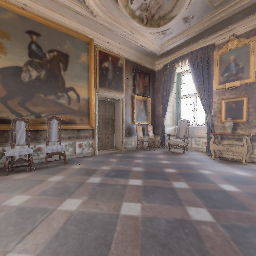

In [10]:
obj1=obj2
display_sample(rgb_obs=obj1['rgb'])

2024-03-14 10:10:48.114 | INFO     | random_walk_sim.parametrized_action:step:70 - Move amount: 1
2024-03-14 10:10:48.115 | INFO     | random_walk_sim.parametrized_action:parametrized_translation:43 - Move amount: 1


Calling param_translation
1


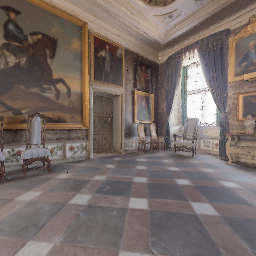

In [11]:
obj2 = env.step({"action":("param_translate"), "action_args":{'move_amount':1}})
print(env.task.actions["param_translate"].move_amount)
display_sample(rgb_obs=obj2['rgb'])

2024-03-14 10:13:06.244 | INFO     | random_walk_sim.parametrized_action:step:156 - Straff angle: 90, Move amount: 1
2024-03-14 10:13:06.245 | INFO     | random_walk_sim.parametrized_action:parametrized_straffing:125 - Straff angle: 90, Move amount: 1


Calling param_straffing
90


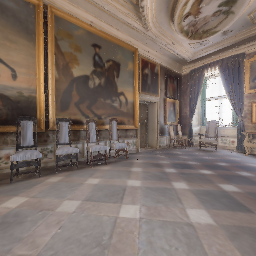

In [17]:
obj2 = env.step({"action":("param_straff"), "action_args":{'straff_angle':90, 'move_amount':1}})
print(env.task.actions["param_straff"].straff_angle)
display_sample(rgb_obs=obj2['rgb'])

2024-03-14 10:13:28.376 | INFO     | random_walk_sim.parametrized_action:step:108 - Turn angle: 90
2024-03-14 10:13:28.377 | INFO     | random_walk_sim.parametrized_action:parametrized_rotation:83 - Turn angle: 90


Calling param_rotate
90


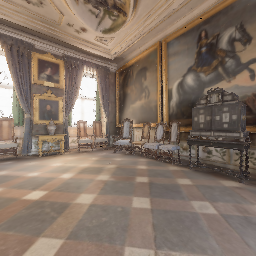

In [18]:
obj2 = env.step({"action":("param_rotate"), "action_args":{'turn_angle':90}})
print(env.task.actions["param_rotate"].turn_angle)
display_sample(rgb_obs=obj2['rgb'])

2024-03-03 15:12:58.670 | INFO     | random_walk_sim.random_action:parametrized_rotation:66 - Turn angle: 30


Calling param_walk
0
0


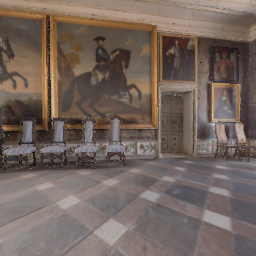

In [9]:
env.task.actions["Paramaterized_Walk"].turn_angle = 30
obj2 = env.step("Paramaterized_Walk")
print(env.task.actions["Paramaterized_Walk"].move_amount)
print(env.task.actions["Paramaterized_Walk"].turn_angle)
display_sample(rgb_obs=obj2['rgb'])

2024-03-03 15:12:58.706 | INFO     | random_walk_sim.random_action:parametrized_rotation:66 - Turn angle: -60


Calling param_walk
0
0


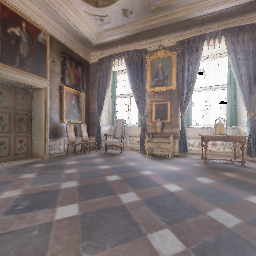

In [10]:
env.task.actions["Paramaterized_Walk"].turn_angle = -60
obj2 = env.step("Paramaterized_Walk")
print(env.task.actions["Paramaterized_Walk"].move_amount)
print(env.task.actions["Paramaterized_Walk"].turn_angle)
display_sample(rgb_obs=obj2['rgb'])

2024-03-03 15:14:08.666 | INFO     | random_walk_sim.random_action:parametrized_straffing:84 - Straff angle: 90, Move amount: -5


Calling param_walk
0
0


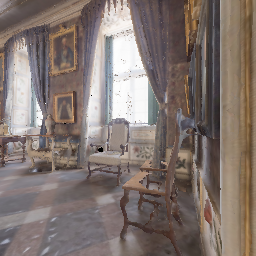

In [19]:
env.task.actions["Paramaterized_Walk"].move_amount = -5
env.task.actions["Paramaterized_Walk"].straff_angle = 90
obj2 = env.step("Paramaterized_Walk")
print(env.task.actions["Paramaterized_Walk"].move_amount)
print(env.task.actions["Paramaterized_Walk"].straff_angle)
display_sample(rgb_obs=obj2['rgb'])

In [31]:
def get_habitatenv():
    config = habitat.get_config(
        config_path="benchmark/nav/pointnav/pointnav_habitat_test.yaml",
        overrides=[
            "habitat.environment.max_episode_steps=10",
            "habitat.environment.iterator_options.shuffle=False",
            "habitat.simulator.agents.main_agent.sim_sensors.rgb_sensor.height=2048",
            "habitat.simulator.agents.main_agent.sim_sensors.rgb_sensor.width=2048",
            "habitat.simulator.create_renderer=True",
            "habitat.simulator.habitat_sim_v0.enable_hbao=True"
        ],
    )

    try:
        env.close()  # type: ignore[has-type]
    except NameError:
        pass
    env = habitat.Env(config=config)
    return env

2024-03-06 04:27:30,778 Initializing dataset PointNav-v1
2024-03-06 04:27:31,331 initializing sim Sim-v0
[04:27:31:410994]:[Warning]:[Assets] ResourceManager.cpp(369)::loadSemanticSceneDescriptor : SSD File Naming Issue! Neither SceneInstanceAttributes-provided name : `data/scene_datasets/habitat-test-scenes/skokloster-castle.scn` nor constructed filename : `data/scene_datasets/habitat-test-scenes/info_semantic.json` exist on disk.
2024-03-06 04:27:32,354 Initializing task Nav-v0
[04:27:32:337518]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 0


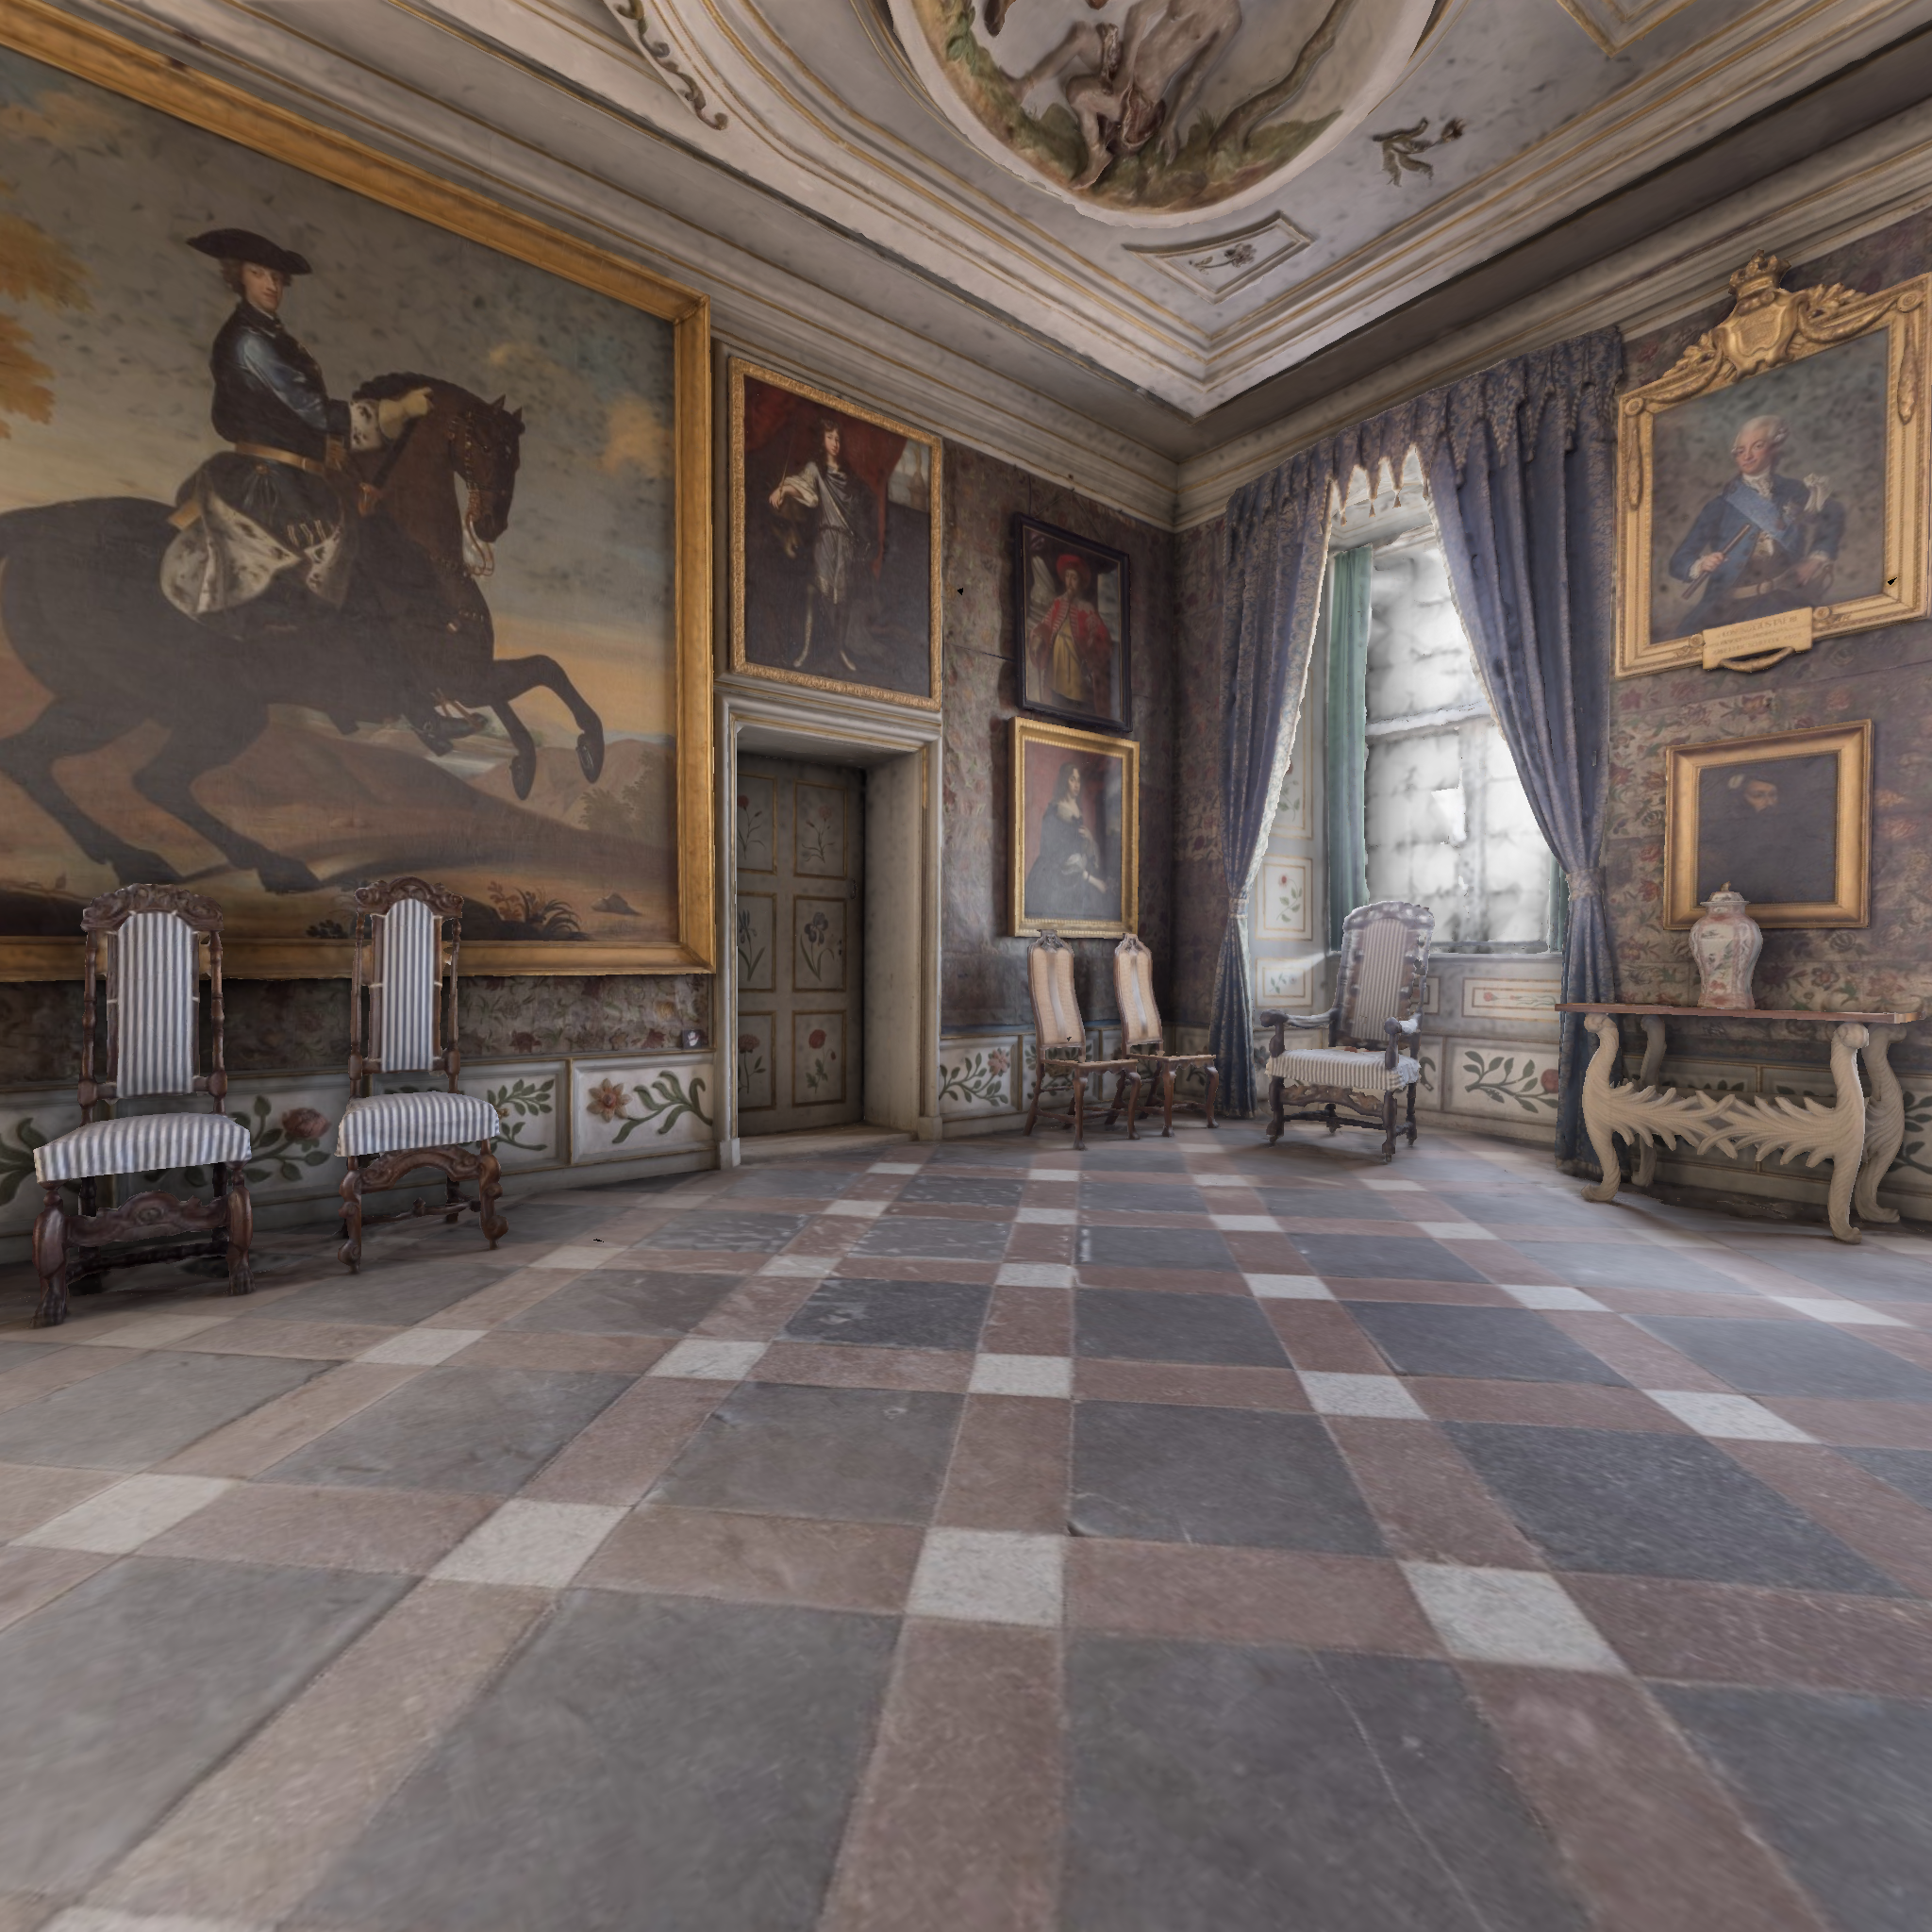

In [32]:
env =  get_habitatenv()
obs1 = env.reset()
display_sample(obs1["rgb"])

In [21]:
config = habitat.get_config(
        config_path="benchmark/nav/pointnav/pointnav_habitat_test.yaml",
        overrides=[
            "habitat.environment.max_episode_steps=10",
            "habitat.environment.iterator_options.shuffle=False",
            "habitat.simulator.agents.main_agent.sim_sensors.rgb_sensor.height=512",
            "habitat.simulator.agents.main_agent.sim_sensors.rgb_sensor.width=512",
            "habitat.simulator.create_renderer=False",
            # "habitat.simulator.habitat_sim_v0.enable_hbao=True"
        ],
    )

In [30]:
config.habitat.simulator.habitat_sim_v0.enable_hbao

False

In [23]:
import json
from omegaconf import OmegaConf
with open('examples/tutorials/colabs/conf.json', 'w') as f:
    f.write(json.dumps(OmegaConf.to_container(config.habitat), indent=4))

In [18]:
env._sim.sample_navigable_point()

[-1.3731882572174072, 0.08431791514158249, 8.606927871704102]

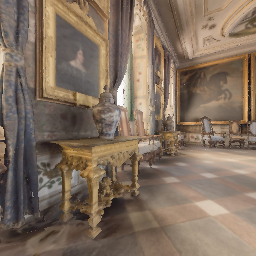

In [8]:
obj1 = env.reset()
img1 = display_sample(rgb_obs=obj1['rgb'])
img1

In [11]:
len(img1.getdata())

65536

In [14]:
np.array(img1).shape

(256, 256, 3)